# Mixture of Gaussians
## Continuation in code
2.      Find code online (or write your own) to generate a mixture of 2D Gaussians.
3.      Find code online (or write your own) that uses EM to cluster the data.
4.      Plot your generated data and the 2D-fitted Gaussians.
5.      What happens if you try to fit a different number of clusters to the data? E.g. fit 5 clusters to data generated with only 2 clusters, or vice versa


## 2.      Find code online (or write your own) to generate a mixture of 2D Gaussians.

I used "pypr" library. That is a convenient library which allows us to generate and sample data from gaussian distributions suitable for clustering. I used their documentation for generating Gaussian Mixtures here: http://pypr.sourceforge.net/mog.html


In [54]:
## SETUP
import numpy as np
import pandas as pd
import numpy as np
from sklearn import mixture
import matplotlib.pyplot as plt
 
%matplotlib inline
plt.style.use('ggplot')
np.random.seed(1234)

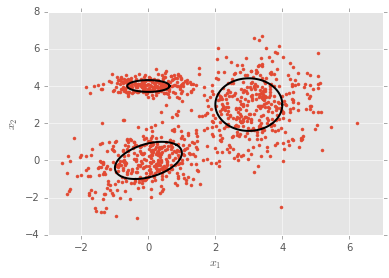

In [55]:
## Using pypr to generate a Mixture of Gaussians
## adapted from http://pypr.sourceforge.net/mog.html 
from pypr.clustering import *
from numpy import *
from matplotlib.pylab import *
import pypr.clustering.gmm as gmm

centroids=[array([10,10])]
ccov=[array([[1,0],[0,1]])]
samples = 10
gmm.sample_gaussian_mixture(centroids, ccov, samples=samples)

# Drawing samples from a Gaussian Mixture Model
# Mixing coefficients
mc = [0.4, 0.4, 0.2] 
# Centers / Means of the clusters
centroids = [ array([0,0]), array([3,3]), array([0,4]) ]
# Covariance matrices
ccov = [ array([[1,0.4],[0.4,1]]), diag((1,2)), diag((0.4,0.1)) ]

# Generating the samped Gaussian Mixture from this data
X = gmm.sample_gaussian_mixture(centroids, ccov, mc, samples=1000)

plot(X[:,0], X[:,1], '.')

for i in range(len(mc)):
    x1, x2 = gmm.gauss_ellipse_2d(centroids[i], ccov[i])
    plot(x1, x2, 'k', linewidth=2)
xlabel('$x_1$'); ylabel('$x_2$')

## 3-4. Find code online (or write your own) that uses EM to cluster the data. Plot your generated data and the 2D-fitted Gaussians.
There appears to be a good implementation of EM within GMM and GaussianMixture modules of sklearn.mixture. 
I used the library documentation and adapted concise code from here: https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html 



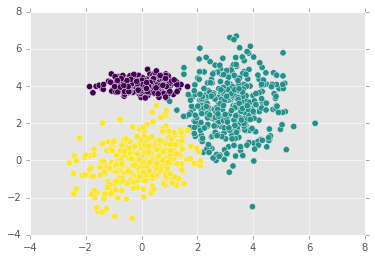

In [56]:
from sklearn.mixture import GMM, GaussianMixture
# in this case I fit the data into 3 clusters, the same number as I orgiianlly generated.
gmm = GaussianMixture(n_components=3).fit(X)
labels = gmm.predict(X)
plot_samenum =  plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');
plot_samenum

## 5.      What happens if you try to fit a different number of clusters to the data? E.g. fit 5 clusters to data generated with only 2 clusters, or vice versa

See the plots below, demostating fitting too few or too many clusters.
The problem, is that it does it easily. Why is this a problem? In reality, we normally don't know the "original" and thus need to guess: we try to stipulate what deos our data look like the most. Because the EM Gaussian model fit to whatever number of lcusters we tell it, it puts the responsibiility in our hand to choose correctly the number of clusters that shuold actually be there.  
When we fitted too *few* clusters, the result of the algorithm seems as though it has almost merged the smallest of the clusters into its bigger neighbor and classified them both as one. However it probably worked to seem similarly because the center of mass is bigger at the larger ones, and thus the algorithm iteratively attracts the means for its stipulated clusters towards the centers of mass it recognizes (assuming there are K number of centers of mass, the K number of clusters we fit).
If we fit too many clusters, it divids them according to proximity; wherever there are less dense areas it is likellier to divide the data there (since it tries to assign the most dense clusters as the means). 


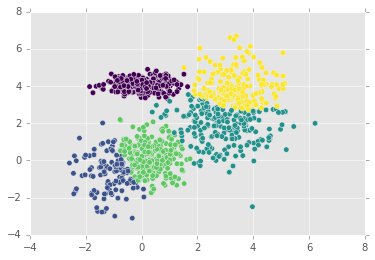

In [57]:
## FITTING TOO MANY: fitting 5 clusters onto the originally 3 clusters generated data
gmm = GaussianMixture(n_components=5).fit(X) #fitting 5
labels = gmm.predict(X)
plt_toomany =  plt.scatter(X[:, 0], X[:, 1], c=labels, s=30, cmap='viridis');
plt_toomany

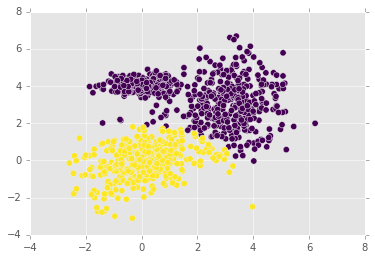

In [58]:
## FITTING TOO FEW: fitting 2 clusters onto the originally 3 clusters generated data
gmm = GaussianMixture(n_components=2).fit(X) #fitting 2
labels = gmm.predict(X)
plot_toofew =  plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');
plot_toofew